In [1]:
import numpy as np 
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv("news_dataset.csv")
df

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...
...,...,...
3724,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3725,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3726,FAKE,The Bengaluru City Police’s official Twitter h...
3727,REAL,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\..."


In [24]:
d=set(df['text'][0:1])
d

{'Payal has accused filmmaker Anurag Kashyap of behaving inappropriately with her in a video that went viral. She maintained her stance while speaking to ETimes and said, “I have wanted to speak about this for a long time. But today, finally I thought I must get it off my head. I had tweeted about my incident sometime ago when the #MeToo movement had happened, but many people told me to delete the tweet else I would stop getting work. My manager too advised me to remove the tweet. I complied. Post that, Anurag blocked me on WhatsApp.”'}

In [3]:
df.isna().sum()


label    0
text     8
dtype: int64

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.isna().sum()
df

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...
...,...,...
3724,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3725,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...
3726,FAKE,The Bengaluru City Police’s official Twitter h...
3727,REAL,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\..."


<Axes: xlabel='label'>

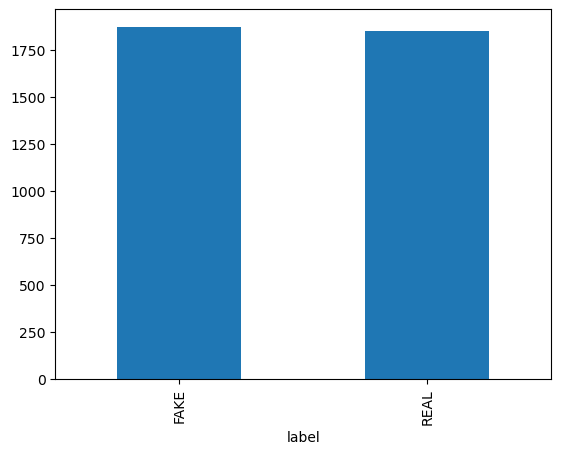

In [6]:
df.groupby('label').text.count().plot(kind='bar')

In [7]:
nltk.download('stopwords')
words=stopwords.words('english')
stemmer=PorterStemmer()
df['cleaned']=df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ",x).split() if i not in words]).lower())
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asmit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text,cleaned
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...,payal accus filmmak anurag kashyap behav inapp...
1,FAKE,A four-minute-long video of a woman criticisin...,a four minut long video woman criticis govern ...
2,FAKE,"Republic Poll, a fake Twitter account imitatin...",republ poll fake twitter account imit arnab go...
3,REAL,"Delhi teen finds place on UN green list, turns...",delhi teen find place un green list turn glass...
4,REAL,Delhi: A high-level meeting underway at reside...,delhi a high level meet underway resid rajya s...
...,...,...,...
3724,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...,ist sep the second round countrywid serosurvey...
3725,REAL,19:17 (IST) Sep 20\n\nThe second round of coun...,ist sep the second round countrywid serosurvey...
3726,FAKE,The Bengaluru City Police’s official Twitter h...,the bengaluru citi polic offici twitter handl ...
3727,REAL,"Sep 20, 2020, 08:00AM IST\n\nSource: TOI.in\n\...",sep am ist sourc toi meet neelkantha bhanu pra...


In [12]:
#traininig model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr=LogisticRegression()
vectorizer=TfidfVectorizer(min_df = 3,stop_words='english',norm='l2')
x=df['cleaned']
y=df['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
pipeline=Pipeline([
    ('vect',vectorizer),
    ('chi',SelectKBest(chi2,k=1200)),
    ('clf',LogisticRegression(random_state=0))
    
]
)
model=pipeline.fit(x_train,y_train)
model

Pipeline(steps=[('vect', TfidfVectorizer(min_df=3, stop_words='english')),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x0000017F03ABA170>)),
                ('clf', LogisticRegression(random_state=0))])

In [17]:
from sklearn.metrics import accuracy_score
predict = model.predict(x_test)
print("Test accuracy = ",accuracy_score(y_test,predict))
print(predict)
print(list(y_test))

Test accuracy =  0.9946284691136974
['REAL' 'FAKE' 'FAKE' ... 'FAKE' 'REAL' 'REAL']
['REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'FA

In [25]:
sample=input("Enter data:")
new_dataFrame=pd.DataFrame({'Original_data':[sample]})
new_dataFrame

Enter data:Payal has accused filmmaker Anurag Kashyap of behaving inappropriately with her in a video that went viral. She maintained her stance while speaking to ETimes and said, “I have wanted to speak about this for a long time. But today, finally I thought I must get it off my head. I had tweeted about my incident sometime ago when the #MeToo movement had happened, but many people told me to delete the tweet else I would stop getting work. My manager too advised me to remove the tweet. I complied. Post that, Anurag blocked me on WhatsApp


,Original_data
0,Payal has accused filmmaker Anurag Kashyap of ...


In [28]:
predict=model.predict(new_dataFrame['Original_data'])
predict


array(['REAL'], dtype=object)

In [30]:
ytest = np.array(y_test)
ytest
print(classification_report(ytest, model.predict(x_test)))
print(confusion_matrix(ytest, model.predict(x_test)))

              precision    recall  f1-score   support

        FAKE       1.00      0.99      0.99       553
        REAL       0.99      1.00      0.99       564

    accuracy                           0.99      1117
   macro avg       0.99      0.99      0.99      1117
weighted avg       0.99      0.99      0.99      1117

[[549   4]
 [  2 562]]
